# Training a Linear Classifier on Spiral Data

We will be training a linear classifier, using a hinge loss, on our toy dataset of points. After training our model, we will be able to visualize the decision boundary that it learned!

Model:
- $f(X; W, b) = XW + B$

Loss:
- Hinge loss, no regularization

In [2]:
import numpy as np

try:
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    pass

import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
from datasets import ToyData
toy_data = ToyData()

Read the docstring for the `ToyData` class (place your cursor on `ToyData()` and hit shift-tab!). How many classes (tendrils) of data will be generated by the dataset?

### Loading the dataset
Look up the method for loading the data from the `toy_data` instance (`toy_data.<tab> brings up available attributes/methods`), and load in the training data/labels, and the testing data/labels. We actually will not be working with the testing data/labels for this notebook.

In [5]:
# SOLUTION
xtrain, ytrain, xtest, ytest = toy_data.load_data()

### Learning about the data

What is the dimensionality of the training data? How many pieces of data are contained in the training data? How many features are contained in a single datum? What is the largest and smalles number contained in the training data?

In [9]:
# SOLUTION
num_pts = xtrain.shape[0]
num_features = xtrain.shape[1]
print(num_pts)
print(num_features)
print(xtrain.max())
print(xtrain.min())

300
2
0.995964
-0.892307


Look at the shape and contents of the training labels. Given the number of pieces of training data that we have and the number of classes amongst them, how does the training labels indicate the class-label for each datum?

This label-formatting is known as **one-hot encoding**, which is a stupid name.

SOLUTION. For each row, which corresponds to a datum, the location of the `1` indicates the class label. All other columns must be zero.

Use the method provided by `toy_data` to plot the data. What objects are returned by this method? They should be familiar to you in the context of the matplotlib function `plt.subplots()`.

<IPython.core.display.Javascript object>


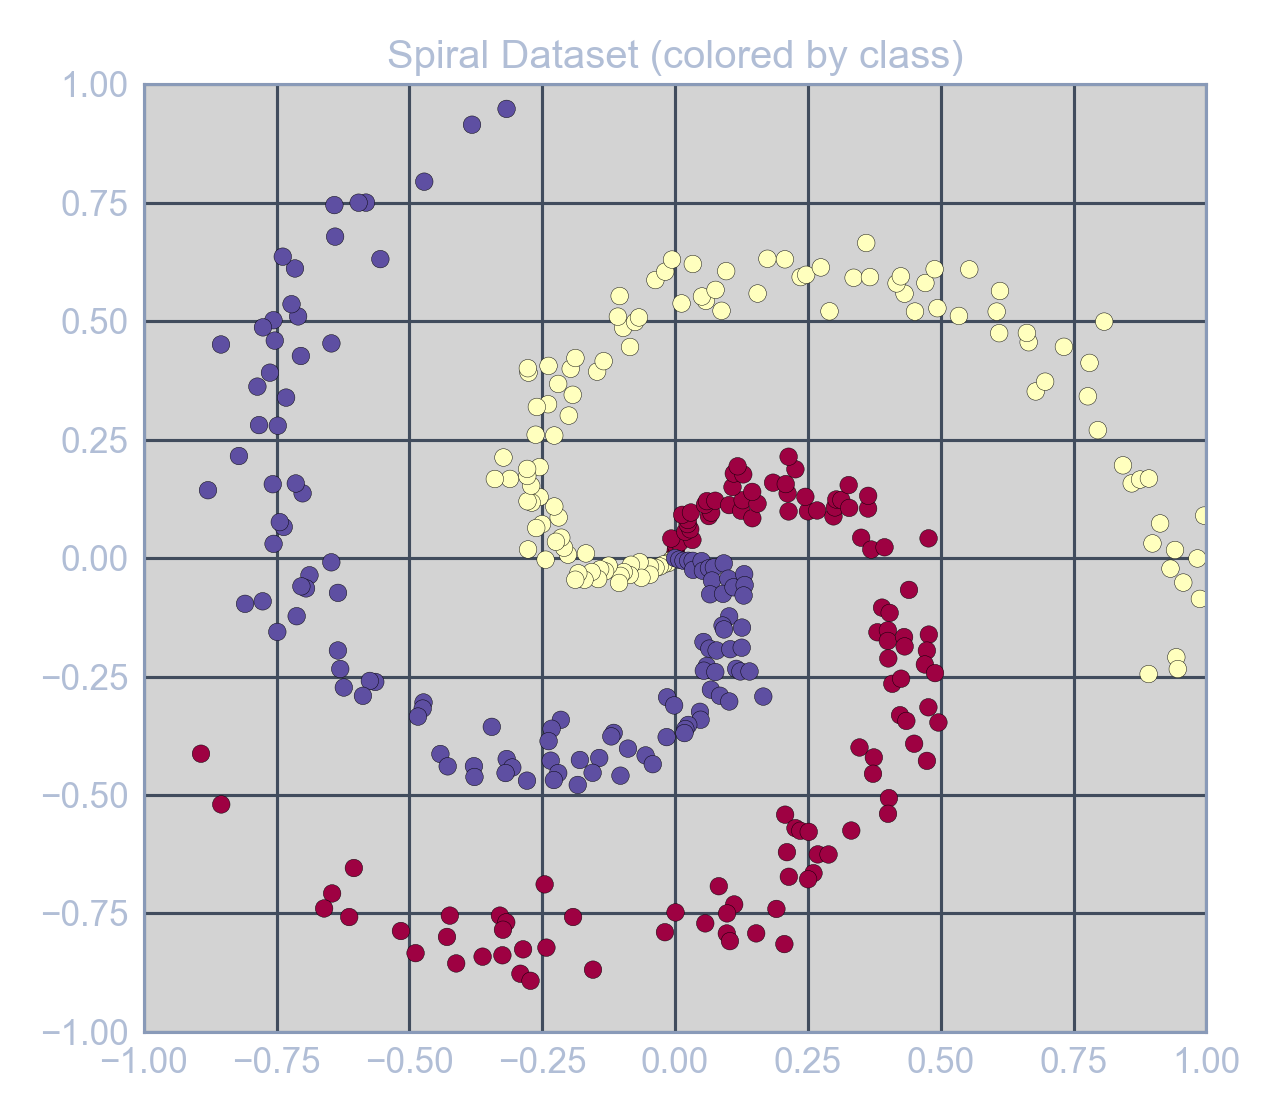

c:\users\ryan soklaski\desktop\cogworks2017_summer\datasets\datasets\__init__.py:148: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor('lightgrey')


(<matplotlib.figure.Figure at 0x1f04a14b898>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f04a143630>)

In [11]:
toy_data.plot_spiraldata()

Use this plot, and your access to the training data and labels to figure our which color belongs to which class-label (0, 1, or 2).

SOLUTION
 - red: 0
 - yellow: 1
 - blue: 2



#### Initializing Your Model's Trainable Parameters
Recall the form of our model:
 - $f(X; W, b) = XW + b$
 
 Given the shape of our training data, what are the shapes of $W$ and $b$?
 
Read the documentation for `np.random.randn` (use shift-tab!). What kind of statistical distribution does this draw from? Is it a uniform distribution? Use this to initialize $W$.

Initialize $b$ as zeros?

Should these be numpy arrays or mygrad tensors?

In [27]:
# SOLUTION

D = 2
K = 3

W = Tensor(np.random.randn(D, K))
b = Tensor(np.zeros((K,), dtype=W.dtype))

#### Preparing your optimization scheme
We will be using "vanilla" gradient descent (referred to as stochastic gradient descent (SGD) in literature) to train our model. Write a simple function that takes in a trainable parameter and any other parameters needed for performing gradient descent. This function should return the updated **data** of the parameter. All operations involving a `Tensor` should only be using its `grad` and `data` properties. We do not want to create a computational graph when we already have the gradients we want! 

This is a rare instance where we want the function to **mutate** the input data: it should work with a *view* of the data and update it. Thus it need not return anything!

Include a reasonably-detailed docstring for this function. Indicate what variable-types it expects and returns.

In [28]:
# SOLUTION
def sgd(param, rate):
    """ Performs a gradient-descent update on the parameter.
    
        Parameters
        ----------
        param : mygrad.Tensor
            The parameter to be updated.
        
        rate : float
            The step size used in the update"""
    param.data -= rate*param.grad
    return None

Write a function that takes in your model's output and any other parameters it needs to compute the mean accuracy of your prediction. Write a descent docstring.

In [29]:
# SOLUTION
def compute_accuracy(model_out, labels):
    """ Computes the mean accuracy, given predictions and true-labels.
        
        Parameters
        ----------
        model_out : numpy.ndarray, shape=(N, K)
            The predicted class-scores
        labels : numpy.ndarray, shape=(N, K)
            The one-hot encoded labels for the data.
        
        Returns
        -------
        float
            The mean classification accuracy of the N samples."""
    return np.mean(np.argmax(model_out, axis=1) == np.argmax(labels, axis=1))

Import `dense` from mygrad's layers and `multiclass_hinge` from the losses.

In [36]:
from mygrad.nnet.layers import dense
from mygrad.nnet.losses import multiclass_hinge

Read the documentation for multiclass hinge. What format of `y_train` does it expect? What is the form of our labels? How can you get labels in the form expected by multiclass hinge?

In [ ]:
# SOLUTION
y = np.argmax(t_train, axis=1)

Using a learning rate of `1.` and **no** regularization, train your model for 1000 iterations. Record the loss and accuracy for each operation. Plot them afterwards.

In [31]:
l = []
acc = []

params = [b, W]
rate = 1.

for i in range(1000):
    o = dense(xtrain, W) + b
    
    loss = multiclass_hinge(o, y)
    
    l.append(loss.data.item())
    loss.backward()

    acc.append(compute_accuracy(o.data, ytrain))
    
    for param in params:
        sgd(param, rate)
    
    loss.null_gradients()

<IPython.core.display.Javascript object>


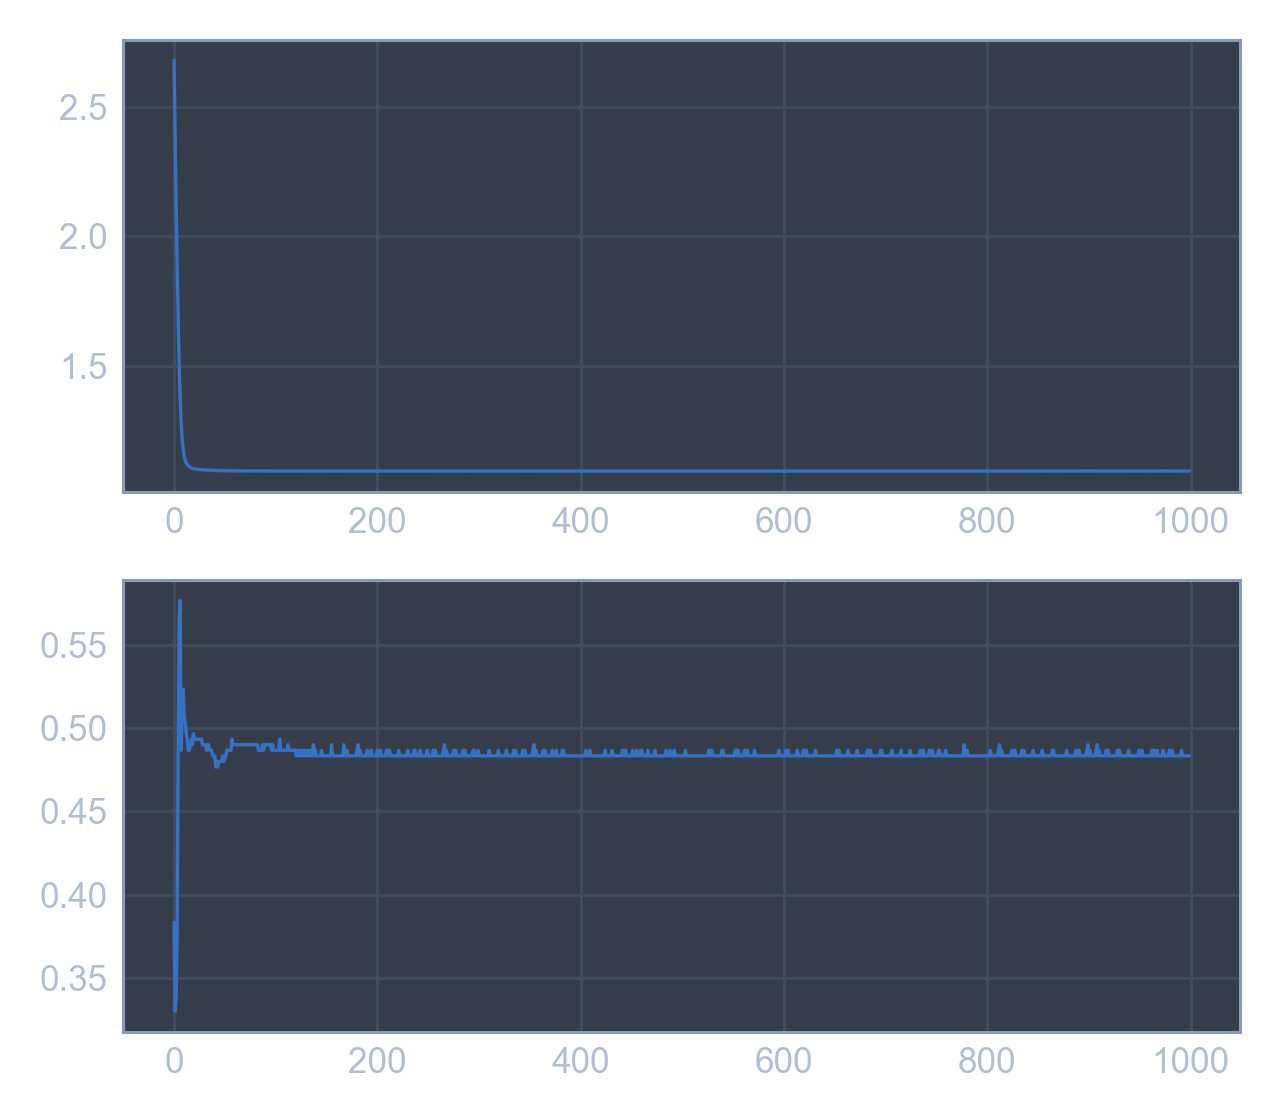

In [32]:
fig,(ax,ax2) = plt.subplots(nrows=2)
ax.plot(l)
ax2.plot(acc)

In [33]:
def fwd_pass(x):
    return (dense(x, W.data) + b.data).data

<IPython.core.display.Javascript object>


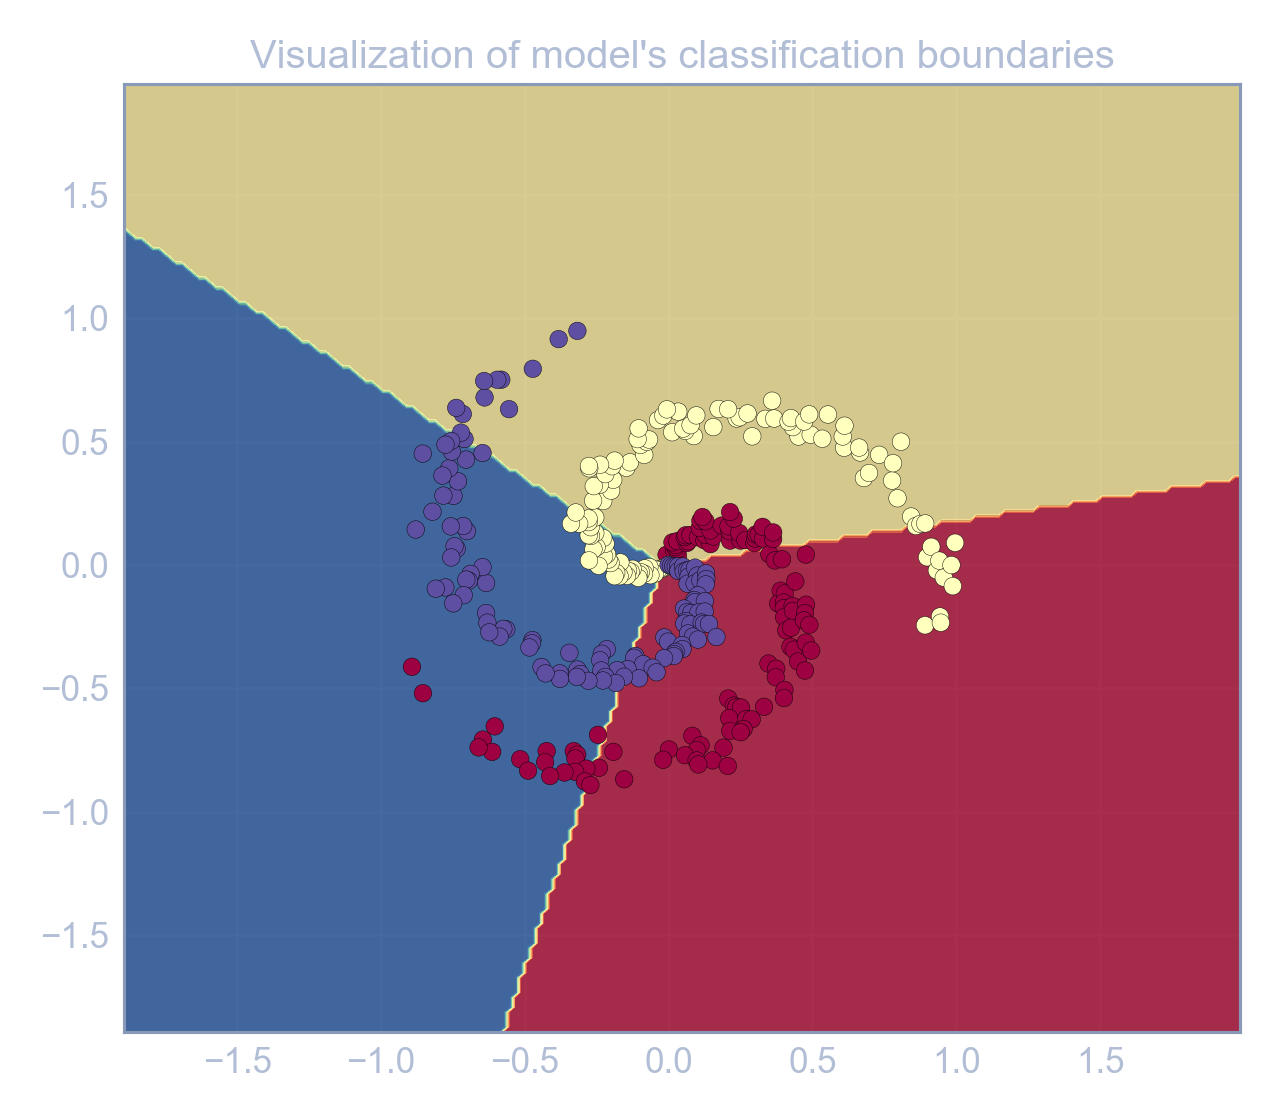

(<matplotlib.figure.Figure at 0x1f04beffb38>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f04ca710f0>)

In [35]:
toy_data.visualize_model(fwd_pass)